<a href="https://colab.research.google.com/github/aditi10998/EDAProject/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cardiovascular Risk Prediction**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


---


**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

**Data Description**

Demographic: 



• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV




In this capstone project we are going to work on a dataset of an ongoing  cardiovascular study on residents of the town of Framingham,Massachusetts.The classification goal is to predict whether the patient has a 10 year risk of future coronary heart disease(CHD).In this project we will be using Classification technique of supervised machine learning.

**Classification** is a technique where we categorize data into given number of class.The main goal of a classification problem is to identify the category/class to which a new data will fall under.

# **Important Libraries**

In [1]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



**Data Acquisition**

In [3]:
#Loading files from google drive to colab and storing in a variable.
File1="/content/drive/MyDrive/EDA_Capstone_Project3/data_cardiovascular_risk.csv"

In [4]:
import warnings
warnings.filterwarnings("ignore")

#Creating Dataframes from csv files
Cardiovascular_risk_df=pd.read_csv(File1)

**Dimensions of Dataset**

In [5]:
#Shape
Cardiovascular_risk_df.shape

(3390, 17)

Our dataset contains 3390 rows and 17 columns.

**Peek the Data**

In [6]:
#To see the first 10 rows of the dataset
Cardiovascular_risk_df.head(20)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


**Statistical Summary**

In [7]:
#Descriptions
Cardiovascular_risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


This is the basic statistical computations on the dataset.Using describe function gives a good picture of the distribution of data.

**Overview of dataset**

In [8]:
Cardiovascular_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Our dataset consists of 3390 enteries and 17 columns which has various datatypes.

In [9]:
Cardiovascular_risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Columns displayed as per their labels.

# **Missing values**

In [10]:
#To check for missing values
Cardiovascular_risk_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Fields like education,cigsPerDay,BPMeds,totChol,glucose are having missing values.

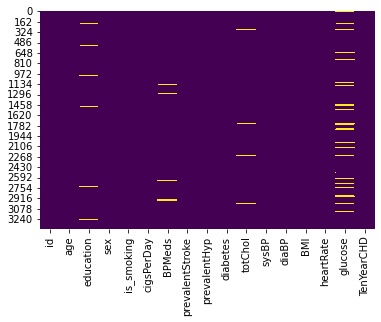

In [11]:
#Heatmap for missing values
sns.heatmap(Cardiovascular_risk_df.isnull(),cbar=False,cmap='viridis')

In [12]:
Cardiovascular_risk_df.sample(20)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
212,212,63,1.0,M,YES,10.0,0.0,0,0,1,240.0,146.0,84.0,30.48,75.0,120.0,0
1959,1959,64,1.0,F,NO,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0,0
916,916,52,3.0,M,NO,0.0,0.0,0,1,0,238.0,131.0,99.0,31.19,96.0,86.0,0
2958,2958,41,1.0,F,YES,5.0,0.0,0,0,0,209.0,107.0,65.0,27.27,84.0,87.0,0
522,522,46,1.0,F,NO,0.0,0.0,0,0,0,222.0,131.0,80.0,25.46,72.0,72.0,0
903,903,45,1.0,M,YES,43.0,0.0,0,1,0,191.0,139.5,75.0,22.30,77.0,NaN,0
1604,1604,47,1.0,F,NO,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0,0
1943,1943,61,1.0,F,YES,20.0,0.0,0,1,0,245.0,140.0,73.0,30.74,90.0,91.0,1
1326,1326,60,3.0,F,NO,0.0,0.0,0,1,0,325.0,182.0,106.0,27.61,80.0,77.0,1
1486,1486,47,1.0,M,NO,0.0,0.0,0,0,0,259.0,139.0,79.0,29.34,70.0,71.0,1


In [13]:
Cardiovascular_risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [14]:
#education,cigsPerDay,BPMeds,totChol,glucose 
Cardiovascular_risk_df['glucose'] = Cardiovascular_risk_df['glucose'].fillna(Cardiovascular_risk_df['glucose'].mode()[0])
Cardiovascular_risk_df['heartRate'] = Cardiovascular_risk_df['heartRate'].fillna(Cardiovascular_risk_df['heartRate'].mode()[0])
Cardiovascular_risk_df['cigsPerDay'] = Cardiovascular_risk_df['cigsPerDay'].fillna(Cardiovascular_risk_df['cigsPerDay'].mean()) 
Cardiovascular_risk_df['totChol'] = Cardiovascular_risk_df['totChol'].fillna(Cardiovascular_risk_df['totChol'].mean())
Cardiovascular_risk_df['BMI'] = Cardiovascular_risk_df['BMI'].fillna(Cardiovascular_risk_df['BMI'].mean())
Cardiovascular_risk_df['BPMeds'] = Cardiovascular_risk_df['BPMeds'].fillna(Cardiovascular_risk_df['BPMeds']).median()
Cardiovascular_risk_df.drop(['education'],axis=1,inplace=True)

In [15]:
Cardiovascular_risk_df.isnull().sum()

id                 0
age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
Cardiovascular_risk_df.set_index('id')

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1


# **Outliers**

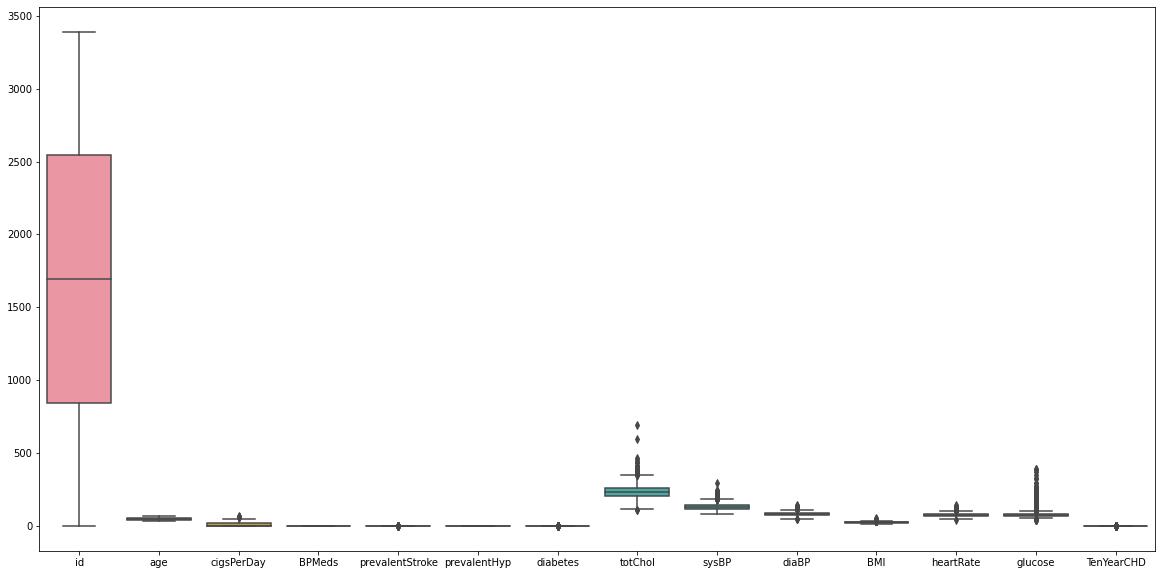

In [17]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=Cardiovascular_risk_df)
plt.show()

In [18]:
Cardiovascular_risk_df['totChol'].max()


696.0

totchol maximum value is at 696.0

In [19]:
Cardiovascular_risk_df['sysBP'].max()

295.0

sysBP maximum value is at 295.0

In [20]:
Cardiovascular_risk_df = Cardiovascular_risk_df[Cardiovascular_risk_df['totChol']<600.0]
Cardiovascular_risk_df =Cardiovascular_risk_df[Cardiovascular_risk_df['sysBP']<295.0]

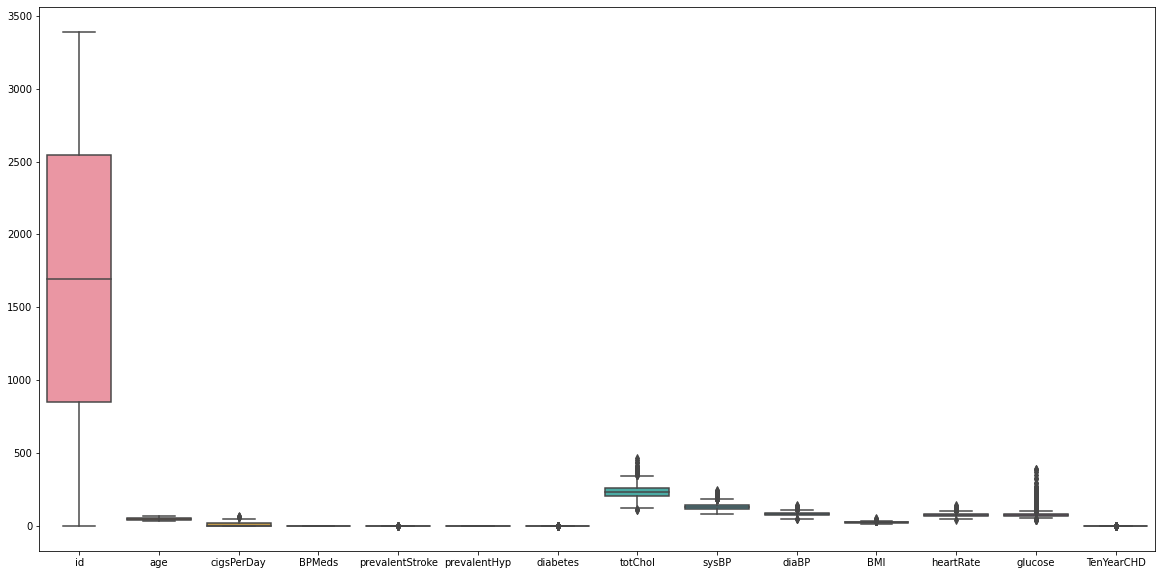

In [21]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=Cardiovascular_risk_df)
plt.show()

**Duplicate Values**

In [22]:
Cardiovascular_risk_df.duplicated().sum()

0

# **Label Encoding**

In [23]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
categ=['sex','is_smoking']

#Encode Categorical columns
le=LabelEncoder()
Cardiovascular_risk_df[categ]=Cardiovascular_risk_df[categ].apply(le.fit_transform)

In [24]:
Cardiovascular_risk_df.head()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


We performed label encoding on sex and is_smoking columns as they contain only two output values.

# **Feature Splitting and Scaling**

In [26]:
y = Cardiovascular_risk_df['TenYearCHD']
X = Cardiovascular_risk_df.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)


Dividing the dataset into training and test for predictive modeling.

In [29]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


# **Predictive Modeling**

### **Logistic Regression**
Logistic Regression utilizes the power of regression to do classification.
One of the main reasons for the model’s success is its power of explainability i.e. calling-out the contribution of individual predictors, quantitatively.Unlike regression which uses Least Squares, the model uses Maximum Likelihood to fit a sigmoid-curve on the target variable distribution.

In [34]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[1147    1]
 [ 193   14]]


Accuracy of Logistic Regression: 85.68265682656828 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1148
           1       0.93      0.07      0.13       207

    accuracy                           0.86      1355
   macro avg       0.89      0.53      0.52      1355
weighted avg       0.87      0.86      0.80      1355



### KNN
K-Nearest Neighbor (KNN) algorithm predicts based on the specified number (k) of the nearest neighboring data points. Here, the pre-processing of the data is significant as it impacts the distance measurements directly. Unlike others, the model does not have a mathematical formula, neither any descriptive ability.

Here, the parameter ‘k’ needs to be chosen wisely; as a value lower than optimal leads to bias, whereas a higher value impacts prediction accuracy.

It is a simple, fairly accurate model preferable mostly for smaller datasets, owing to huge computations involved on the continuous predictors.**bold text**

In [35]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[997 151]
 [167  40]]


Accuracy of k-NN Classification: 76.53136531365313 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1148
           1       0.21      0.19      0.20       207

    accuracy                           0.77      1355
   macro avg       0.53      0.53      0.53      1355
weighted avg       0.76      0.77      0.76      1355



### **Decision Tree**

In [36]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[979 169]
 [162  45]]


Accuracy of DecisionTreeClassifier: 75.5719557195572 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1148
           1       0.21      0.22      0.21       207

    accuracy                           0.76      1355
   macro avg       0.53      0.54      0.53      1355
weighted avg       0.76      0.76      0.76      1355



### **Hyperparameter Tuning for best Classifier**
Using randomized Search Cross Validation


### **Random Forest Classifier**

A Random Forest is a reliable ensemble of multiple Decision Trees (or CARTs); though more popular for classification, than regression applications. Here, the individual trees are built via bagging (i.e. aggregation of bootstraps which are nothing but multiple train datasets created via sampling of records with replacement) and split using fewer features. The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data.

However, the algorithm does not work well for datasets having a lot of outliers, something which needs addressing prior to the model building.

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [39]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.847970479704797
Accuracy of Hyper-tuned Random Forest Classifier: 84.7970479704797 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1148
           1       0.53      0.04      0.07       207

    accuracy                           0.85      1355
   macro avg       0.69      0.52      0.49      1355
weighted avg       0.80      0.85      0.79      1355

